In [ ]:
# ----------------------------
# BASE
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

# ----------------------------
# INSTALL
# !pip install mlxtend

# ----------------------------
# TRANSACTION ENCODER
from mlxtend.preprocessing import TransactionEncoder

# ----------------------------
# APRIORI FUNCTION 
from mlxtend.frequent_patterns import apriori, association_rules

# ----------------------------
# ITERTOOLS 
import itertools

# ----------------------------
# CONFIGURATION
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format

<h1 style="color:forestgreen" >2. Data</h1> 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Market basket analysis/data/GroceryStoreDataSet.csv",names=['products'],header=None)
df

,products
0,"MILK,BREAD,BISCUIT"
1,"BREAD,MILK,BISCUIT,CORNFLAKES"
2,"BREAD,TEA,BOURNVITA"
3,"JAM,MAGGI,BREAD,MILK"
4,"MAGGI,TEA,BISCUIT"
5,"BREAD,TEA,BOURNVITA"
6,"MAGGI,TEA,CORNFLAKES"
7,"MAGGI,BREAD,TEA,BISCUIT"
8,"JAM,MAGGI,BREAD,TEA"
9,"BREAD,MILK"


<a id='tidydata'></a>
<h1 style="color:forestgreen" >3. Datos ordenados para las reglas de la asociación</h1> 

In [ ]:
data = list(df["products"].apply(lambda x:x.split(',')))

from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_data = te.fit(data).transform(data)
df = pd.DataFrame(te_data,columns=te.columns_).astype(int)

df

,BISCUIT,BOURNVITA,BREAD,COCK,COFFEE,CORNFLAKES,JAM,MAGGI,MILK,SUGER,TEA
0,1,0,1,0,0,0,0,0,1,0,0
1,1,0,1,0,0,1,0,0,1,0,0
2,0,1,1,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,1,1,1,0,0
4,1,0,0,0,0,0,0,1,0,0,1
5,0,1,1,0,0,0,0,0,0,0,1
6,0,0,0,0,0,1,0,1,0,0,1
7,1,0,1,0,0,0,0,1,0,0,1
8,0,0,1,0,0,0,1,1,0,0,1
9,0,0,1,0,0,0,0,0,1,0,0


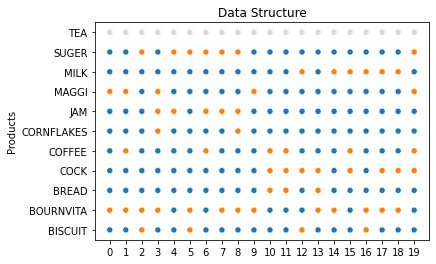

In [ ]:
p = df.copy()
for i in range(1, len(p.columns)+1):
    p["Cat"] = np.where(p[p.columns[i]] == 1, 1, 0)
    p[p.columns[i]]= i
    g =sns.scatterplot(p.index, p[p.columns[i]], hue = p.Cat, legend = False)
    g.yaxis.set_label_text('Products')
    g.set_yticks(np.arange(1, len(p.columns)))
    g.set_xticks(df.index)
    g.set_yticklabels(df.columns)
    plt.title("Data Structure")


<a id='step'></a>
<h1 style="color:forestgreen" >4. Paso a paso</h1> 


**Primera Iteration:** Encuentre valores de soporte para cada producto.
- n: 20 (df.shape[0])

In [ ]:
# Encontrar la frecuencia de los elementos
df.sum().sort_values()

JAM            2
COCK           3
BOURNVITA      4
MAGGI          5
MILK           5
CORNFLAKES     6
SUGER          6
BISCUIT        7
TEA            7
COFFEE         8
BREAD         13
dtype: int64

Si dividimos todos los elementos con el número de fila, podemos encontrar el valor de Soporte. Nuestro valor de umbral es 0,2 para el valor de soporte.

In [ ]:
# Product Frequency / Total Sales
first = pd.DataFrame(df.sum() / df.shape[0], columns = ["Support"]).sort_values("Support", ascending = False)
first

,Support
BREAD,0.65
COFFEE,0.40
BISCUIT,0.35
TEA,0.35
CORNFLAKES,0.30
SUGER,0.30
MAGGI,0.25
MILK,0.25
BOURNVITA,0.20
COCK,0.15


In [ ]:
# Eliminación por valor de soporte
first[first.Support >= 0.15]

,Support
BREAD,0.65
COFFEE,0.40
BISCUIT,0.35
TEA,0.35
CORNFLAKES,0.30
SUGER,0.30
MAGGI,0.25
MILK,0.25
BOURNVITA,0.20
COCK,0.15


**Segunda Iteration:** Encuentre valores de soporte para combinaciones de productos de pares.

In [ ]:
second = list(itertools.combinations(first.index, 2))
second = [list(i) for i in second]
# Muestra de combinaciones
second[:10]

[['BREAD', 'COFFEE'],
 ['BREAD', 'BISCUIT'],
 ['BREAD', 'TEA'],
 ['BREAD', 'CORNFLAKES'],
 ['BREAD', 'SUGER'],
 ['BREAD', 'MAGGI'],
 ['BREAD', 'MILK'],
 ['BREAD', 'BOURNVITA'],
 ['BREAD', 'COCK'],
 ['BREAD', 'JAM']]

In [ ]:
# Encontrar valores de apoyo
value = []
for i in range(0, len(second)):
    temp = df.T.loc[second[i]].sum() 
    temp = len(temp[temp == df.T.loc[second[i]].shape[0]]) / df.shape[0]
    value.append(temp)
# Create a data frame            
secondIteration = pd.DataFrame(value, columns = ["Support"])
secondIteration["index"] = [tuple(i) for i in second]
secondIteration['length'] = secondIteration['index'].apply(lambda x:len(x))
secondIteration = secondIteration.set_index("index").sort_values("Support", ascending = False)
# Elimination by Support Value
secondIteration = secondIteration[secondIteration.Support > 0.1]
secondIteration

,Support,length
index,,
"(TEA, MAGGI)",0.20,2
"(BREAD, TEA)",0.20,2
"(BREAD, SUGER)",0.20,2
"(BREAD, MILK)",0.20,2
"(BREAD, BISCUIT)",0.20,2
"(COFFEE, CORNFLAKES)",0.20,2
"(COFFEE, SUGER)",0.20,2
"(BREAD, COFFEE)",0.15,2
"(BREAD, MAGGI)",0.15,2


<a id='myfunction'></a>
<h1 style="color:forestgreen" >5. Mi función</h1> 

El paquete mlxtend nos ayuda a analizar los problemas de las reglas de asociación. En este contenido, intenté crear mi propia función para las reglas de asociación.

In [ ]:
def ar_iterations(data, num_iter = 1, support_value = 0.1, iterationIndex = None):
    
    # Next Iterations
    def ar_calculation(iterationIndex = iterationIndex): 
        # Calculation of support value
        value = []
        for i in range(0, len(iterationIndex)):
            result = data.T.loc[iterationIndex[i]].sum() 
            result = len(result[result == data.T.loc[iterationIndex[i]].shape[0]]) / data.shape[0]
            value.append(result)
        # Bind results
        result = pd.DataFrame(value, columns = ["Support"])
        result["index"] = [tuple(i) for i in iterationIndex]
        result['length'] = result['index'].apply(lambda x:len(x))
        result = result.set_index("index").sort_values("Support", ascending = False)
        # Elimination by Support Value
        result = result[result.Support > support_value]
        return result    
    
    # First Iteration
    first = pd.DataFrame(df.T.sum(axis = 1) / df.shape[0], columns = ["Support"]).sort_values("Support", ascending = False)
    first = first[first.Support > support_value]
    first["length"] = 1
    
    if num_iter == 1:
        res = first.copy()
        
    # Second Iteration
    elif num_iter == 2:
        
        second = list(itertools.combinations(first.index, 2))
        second = [list(i) for i in second]
        res = ar_calculation(second)
        
    # All Iterations > 2
    else:
        nth = list(itertools.combinations(set(list(itertools.chain(*iterationIndex))), num_iter))
        nth = [list(i) for i in nth]
        res = ar_calculation(nth)
    
    return res

In [ ]:
iteration1 = ar_iterations(df, num_iter=1, support_value=0.1)
iteration1

,Support,length
BREAD,0.65,1
COFFEE,0.40,1
BISCUIT,0.35,1
TEA,0.35,1
CORNFLAKES,0.30,1
SUGER,0.30,1
MAGGI,0.25,1
MILK,0.25,1
BOURNVITA,0.20,1
COCK,0.15,1


In [ ]:
iteration2 = ar_iterations(df, num_iter=2, support_value=0.1)
iteration2

,Support,length
index,,
"(COFFEE, CORNFLAKES)",0.20,2
"(BREAD, TEA)",0.20,2
"(TEA, MAGGI)",0.20,2
"(BREAD, SUGER)",0.20,2
"(BREAD, BISCUIT)",0.20,2
"(BREAD, MILK)",0.20,2
"(COFFEE, SUGER)",0.20,2
"(BREAD, COFFEE)",0.15,2
"(COFFEE, COCK)",0.15,2


In [ ]:
iteration3 = ar_iterations(df, num_iter=3, support_value=0.01,
              iterationIndex=iteration2.index)
iteration3

,Support,length
index,,
"(BISCUIT, COCK, CORNFLAKES)",0.10,3
"(TEA, BOURNVITA, BREAD)",0.10,3
"(TEA, MAGGI, BREAD)",0.10,3
"(SUGER, COFFEE, BREAD)",0.10,3
"(BISCUIT, CORNFLAKES, COFFEE)",0.10,3
"(BISCUIT, BREAD, MILK)",0.10,3
"(COCK, CORNFLAKES, COFFEE)",0.10,3
"(BISCUIT, COCK, COFFEE)",0.10,3
"(BISCUIT, TEA, MAGGI)",0.10,3


In [ ]:
iteration4 = ar_iterations(df, num_iter=4, support_value=0.01,
              iterationIndex=iteration3.index)
iteration4

,Support,length
index,,
"(BISCUIT, COCK, CORNFLAKES, COFFEE)",0.10,4
"(CORNFLAKES, TEA, COFFEE, MILK)",0.05,4
"(BISCUIT, CORNFLAKES, BREAD, MILK)",0.05,4
"(BISCUIT, TEA, MAGGI, BREAD)",0.05,4


<a id='ar'></a>
<h1 style="color:forestgreen" >6. Regla de Asociación</h1> 

Aquí hay dos funciones principales.
- La función `apriori ()` evalúa el valor de soporte para cada producto.
- La función `association_rules ()` nos ayuda a comprender la relación entre antecedentes y productos de consecuencias. Proporciona información notable sobre los productos.

Especialmente, las variables de "soporte antecedente", "soporte consecuente", "soporte", "confianza" y "elevación" son muy importantes para tomar algunas decisiones comerciales.

In [ ]:
# Apriori
freq_items = apriori(df,  min_support = 0.2, use_colnames = True)
freq_items.sort_values("support", ascending = False)

,support,itemsets
2,0.65,(BREAD)
3,0.40,(COFFEE)
0,0.35,(BISCUIT)
8,0.35,(TEA)
4,0.30,(CORNFLAKES)
7,0.30,(SUGER)
5,0.25,(MAGGI)
6,0.25,(MILK)
1,0.20,(BOURNVITA)
9,0.20,"(BISCUIT, BREAD)"


### El valor de soporte nos brinda esta información:

**Head 5**
- 65 por ciento de 100 compras son "PAN"
- El 40 por ciento de las 100 compras son "CAFÉ"
- El 35 por ciento de las 100 compras son "BISCUIT"
- El 35 por ciento de las 100 compras son "TEA"
- El 30 por ciento de las 100 compras son "CORNFLAKES"

**Tail 5**
- El 10 por ciento de 100 compras son "MAGGI" y "BISCUIT"
- El 10 por ciento de las 100 compras son "LECHE" y "GALLETAS"
- El 10 por ciento de las 100 compras son "TÉ" y "BISCUIT"
- El 10 por ciento de las 100 compras son "JAM" y "BISCUIT"
- El 10 por ciento de las 100 compras son "COCK", "CAFÉ", "GALLETAS" y "CORNFLAKES"

In [ ]:
freq_items.sort_values("support", ascending = False).head(5)

,support,itemsets
2,0.65,(BREAD)
3,0.40,(COFFEE)
0,0.35,(BISCUIT)
8,0.35,(TEA)
4,0.30,(CORNFLAKES)


In [ ]:
freq_items.sort_values("support", ascending = False).tail(5)

,support,itemsets
11,0.20,"(BREAD, SUGER)"
12,0.20,"(TEA, BREAD)"
13,0.20,"(COFFEE, CORNFLAKES)"
14,0.20,"(COFFEE, SUGER)"
15,0.20,"(TEA, MAGGI)"


In [ ]:
# Association Rules & Info
df_ar = association_rules(freq_items, metric = "confidence", min_threshold = 0.2)
df_ar

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(BISCUIT),(BREAD),0.35,0.65,0.20,0.57,0.88,-0.03,0.82
1,(BREAD),(BISCUIT),0.65,0.35,0.20,0.31,0.88,-0.03,0.94
2,(BREAD),(MILK),0.65,0.25,0.20,0.31,1.23,0.04,1.08
3,(MILK),(BREAD),0.25,0.65,0.20,0.80,1.23,0.04,1.75
4,(BREAD),(SUGER),0.65,0.30,0.20,0.31,1.03,0.01,1.01
5,(SUGER),(BREAD),0.30,0.65,0.20,0.67,1.03,0.01,1.05
6,(TEA),(BREAD),0.35,0.65,0.20,0.57,0.88,-0.03,0.82
7,(BREAD),(TEA),0.65,0.35,0.20,0.31,0.88,-0.03,0.94
8,(COFFEE),(CORNFLAKES),0.40,0.30,0.20,0.50,1.67,0.08,1.40
9,(CORNFLAKES),(COFFEE),0.30,0.40,0.20,0.67,1.67,0.08,1.80


- La variable de soporte antecedente nos dice la probabilidad de productos antecedentes solamente
- La variable de soporte de consecuentes nos dice la probabilidad de productos consecuentes solamente
- El valor de soporte es el valor de los dos productos (antecedentes y consecuencias)
- La confianza es una indicación de la frecuencia con la que se ha determinado que la regla es cierta.
- La relación entre el apoyo observado y el esperado si X e Y fueran independientes.

In [ ]:
df_ar[(df_ar.support > 0.15) & (df_ar.confidence > 0.5)].sort_values("confidence", ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(MILK),(BREAD),0.25,0.65,0.20,0.80,1.23,0.04,1.75
9,(MAGGI),(TEA),0.25,0.35,0.20,0.80,2.29,0.11,3.25
2,(SUGER),(BREAD),0.30,0.65,0.20,0.67,1.03,0.01,1.05
5,(CORNFLAKES),(COFFEE),0.30,0.40,0.20,0.67,1.67,0.08,1.80
7,(SUGER),(COFFEE),0.30,0.40,0.20,0.67,1.67,0.08,1.80
0,(BISCUIT),(BREAD),0.35,0.65,0.20,0.57,0.88,-0.03,0.82
3,(TEA),(BREAD),0.35,0.65,0.20,0.57,0.88,-0.03,0.82
8,(TEA),(MAGGI),0.35,0.25,0.20,0.57,2.29,0.11,1.75
